<a href="https://colab.research.google.com/github/annamarydona/project/blob/main/Project_LOAN_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Information**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict wheather a loan would be approved or not.

###Below is the dataset attributes with description

Variable  - Description

---



Loan_ID  - Unique Loan ID

Gender   - Male/Female

Married  - Applicant married (Y/N)

Dependents - Number of dependents

Education  - Applicant Education (Graduate/ Under Graduate)

Self Employed - Self employed (Y/N)

Applicantincome - Applicant income

Coapplicantincome - Coapplicant income

LoanAmount - Loan amount in thousands

Loan Amount Term - Term of loan in months

Credit_History - credit history meets guidelines

Property Area  -Urban/ Semi Urban/ Rural

Loan_Status - Loan approved (Y/N)

#**Importing Libraries**

---





*Load and Read the file*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.tail())

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611     

*Print Columns*

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

*Shape* *or* *Size* *of* *the* *data*

In [ ]:
df.shape

(614, 13)

*Checking the numerical statistics of the data*

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


*Checking the data types of each columns*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#**Preprocessing the dataset**

---



*Finding Duplicated values*

In [ ]:
df.duplicated().sum()

0

*Distribution of Loan status*

Y    422
N    192
Name: Loan_Status, dtype: int64


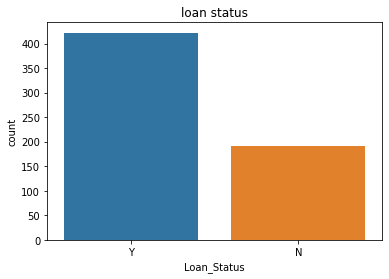

In [ ]:
#count plot
print(df['Loan_Status'].value_counts())
sns.countplot(x=df['Loan_Status'])
plt.title('loan status')
plt.show()

*Pie Plot*

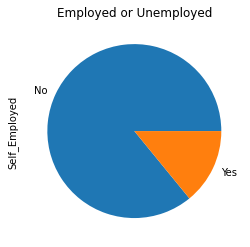

In [ ]:
plt.figure(figsize=(6,4))
df['Self_Employed'].value_counts().plot(kind="pie")
plt.title('Employed or Unemployed')
plt.show()

*Joint Plot*

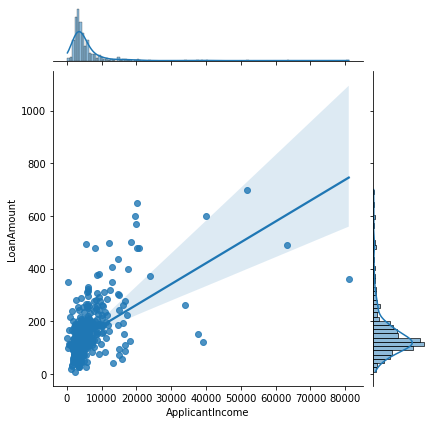

In [ ]:
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=df,kind='reg')

In [ ]:
df.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##**Handling Missing Values**

In [ ]:
#Checking Missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

*Fill Missing values by mode and mean*

In [ ]:
#Fill missing values for categorical terms-mode
categorical=[i for i in df.columns if df[i].dtype== 'O']
print('The categorical variables are==>',categorical)

The categorical variables are==> ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
for i in categorical:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
#Fill missing values for numerical terms-mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###**String Replace**

In [ ]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['Dependents']=df['Dependents'].str.replace('+',' ')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3      51
Name: Dependents, dtype: int64

In [ ]:
#Checking the current null values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#**Exploratory** **Data** **Analysis**

*Count Plot*

<AxesSubplot:xlabel='Gender', ylabel='count'>

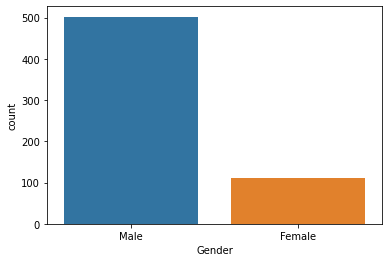

In [ ]:
#Categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

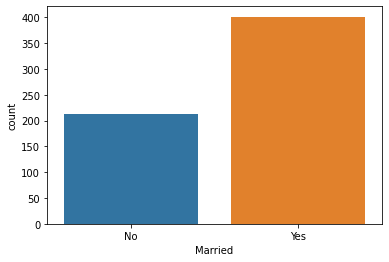

In [ ]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

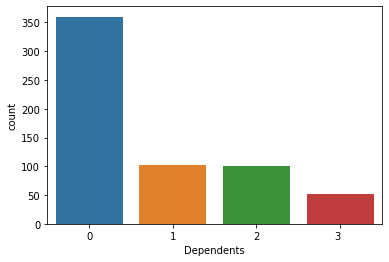

In [ ]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

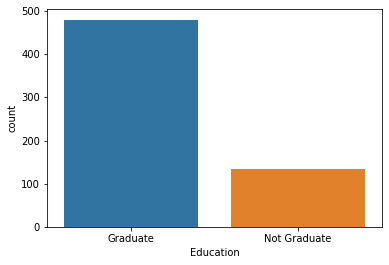

In [ ]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

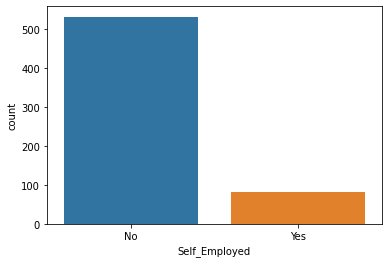

In [ ]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

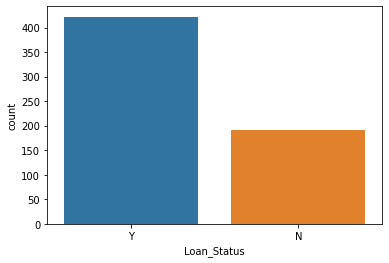

In [ ]:
sns.countplot(df['Loan_Status'])

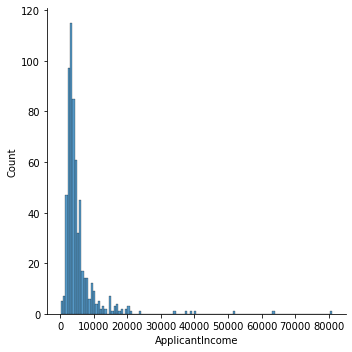

In [ ]:
#Numerical attributes visualization
sns.displot(df['ApplicantIncome'])


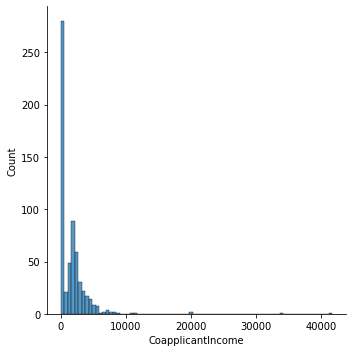

In [ ]:
sns.displot(df['CoapplicantIncome'])

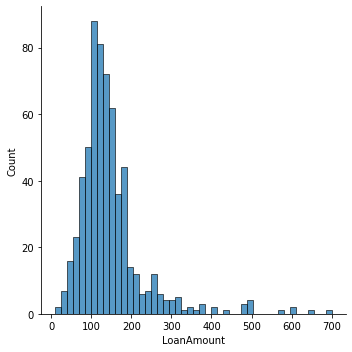

In [ ]:
sns.displot(df['LoanAmount'])

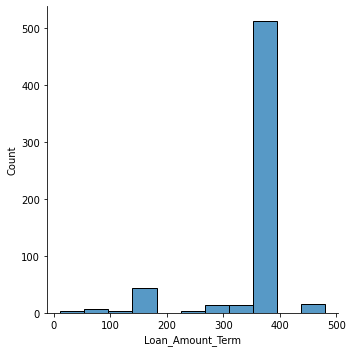

In [ ]:
sns.displot(df['Loan_Amount_Term'])

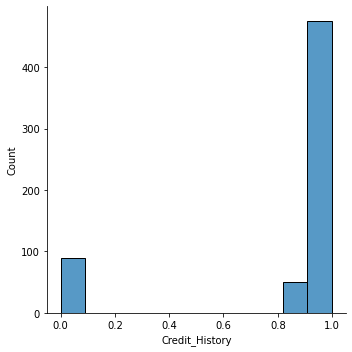

In [ ]:
sns.displot(df['Credit_History'])

#**Creation of new attributes**

In [ ]:
#Total income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#**Log Transformation**

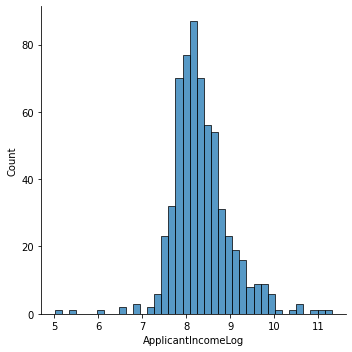

In [ ]:
#apply log transformation to the attribute
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome'])
sns.displot(df['ApplicantIncomeLog'])

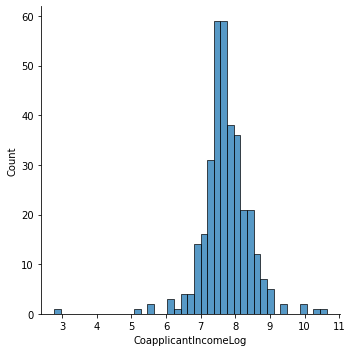

In [ ]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome'])
sns.displot(df['CoapplicantIncomeLog'])

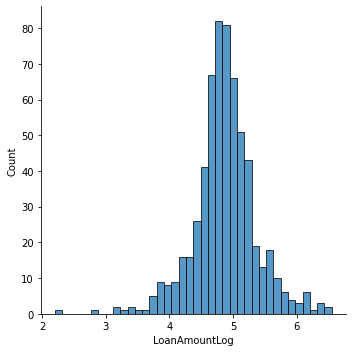

In [ ]:
df['LoanAmountLog']=np.log(df['LoanAmount'])
sns.displot(df['LoanAmountLog'])

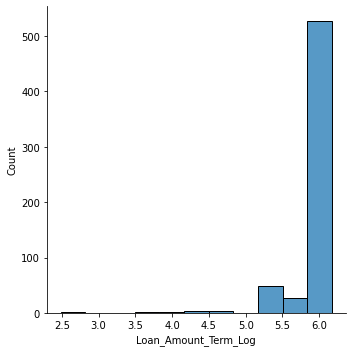

In [ ]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term_Log'])

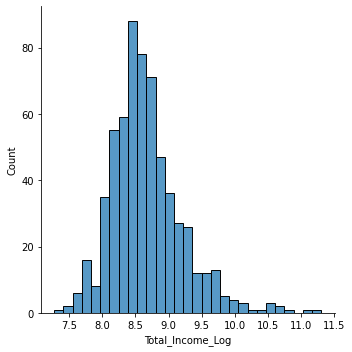

In [ ]:
df['Total_Income_Log']=np.log(df['Total_Income'])
sns.displot(df['Total_Income_Log'])

In [ ]:
#Checking the correlation between numerical columns
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.108432,0.434849,-0.024085,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.711061,0.204179,-0.042941,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.417763,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,-0.079338,0.086531,0.938871,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.063210,-0.025248,-0.007860,0.019156
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.585476,0.503817,-0.042237,0.852873
ApplicantIncomeLog,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,0.021399,0.491066,-0.014618,0.740300
CoapplicantIncomeLog,0.108432,0.711061,0.417763,-0.079338,-0.063210,0.585476,0.021399,1.000000,0.393070,-0.055967,0.649026
LoanAmountLog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,0.393070,1.000000,0.084534,0.657507
Loan_Amount_Term_Log,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,-0.055967,0.084534,1.000000,-0.029522


<AxesSubplot:>

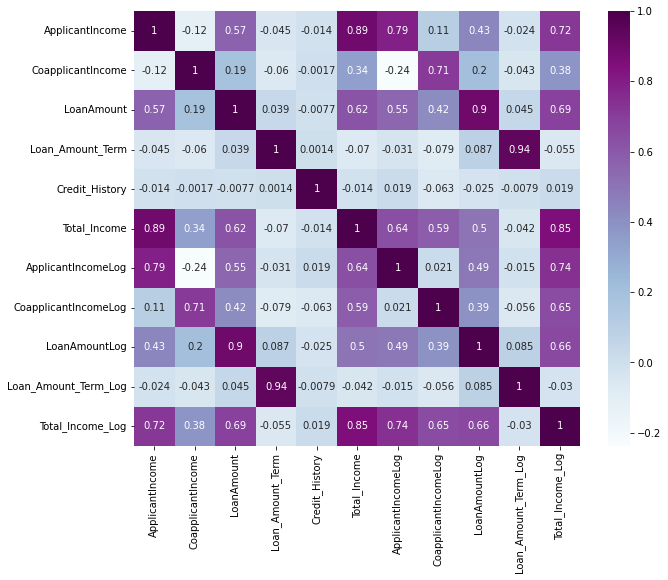

In [ ]:
#Plotting the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [ ]:
#drop unnecessary columns
df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncomeLog','Loan_ID'],axis=1)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,4.262680,5.886104,7.972466
610,Male,Yes,3,Graduate,No,1.0,Rural,Y,8.320205,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,5.231109,5.886104,8.933664


#**Encoding Technique-Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Loan_ID','Dependents']
for col in cols:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


#**Separate Input & Output Datas**

In [ ]:
x=df.drop(['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncomeLog'],axis=1)
y=df['Loan_Status']
print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          0              0             1.0   
1         1        1           1          0              0             1.0   
2         1        1           0          0              1             1.0   
3         1        1           0          1              0             1.0   
4         1        0           0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
609       0        0           0          0              0             1.0   
610       1        1           3          0              0             1.0   
611       1        1           1          0              0             1.0   
612       1        1           2          0              0             1.0   
613       0        0           0          0              1             0.0   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amo

#**Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.30,random_state=42)
y_train

350    1
377    1
163    1
609    1
132    1
      ..
380    1
446    1
144    1
290    1
353    0
Name: Loan_Status, Length: 185, dtype: int64

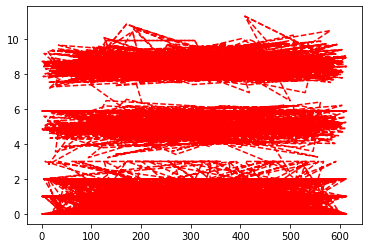

In [ ]:
plt.plot(x_test,linestyle='dashed',color='r')
plt.show()

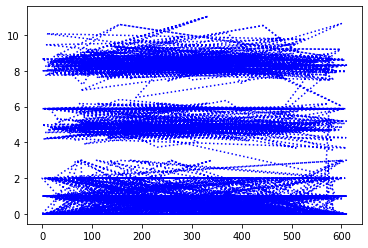

In [ ]:
plt.plot(x_train,linestyle='dotted',color='b')
plt.show()

#**Normalization Method-StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.42230788,  0.62528189, -0.78697069, ...,  1.15577095,
         0.21404044,  0.86084201],
       [ 0.42230788,  0.62528189, -0.78697069, ...,  0.01806891,
         0.21404044, -0.51629061],
       [ 0.42230788,  0.62528189,  1.15422368, ...,  0.41307853,
         0.21404044, -0.02799059],
       ...,
       [ 0.42230788,  0.62528189,  1.15422368, ...,  0.75432886,
        -2.78454697,  1.33753831],
       [ 0.42230788,  0.62528189, -0.78697069, ...,  0.15362546,
         0.21404044, -0.06891495],
       [-2.36794064,  0.62528189, -0.78697069, ..., -0.41443172,
         0.21404044, -0.06588954]])

#**Model Training**

###**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[[ 56  23]
 [ 71 279]]
accuracy score = 0.7808857808857809
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       127
           1       0.80      0.92      0.86       302

    accuracy                           0.78       429
   macro avg       0.75      0.68      0.70       429
weighted avg       0.77      0.78      0.76       429



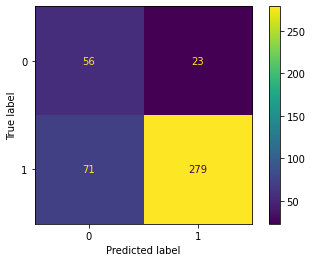

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score1=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score1)
print(report)

###**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[[ 60  35]
 [ 67 267]]
accuracy score = 0.7622377622377622
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       127
           1       0.80      0.88      0.84       302

    accuracy                           0.76       429
   macro avg       0.72      0.68      0.69       429
weighted avg       0.75      0.76      0.75       429



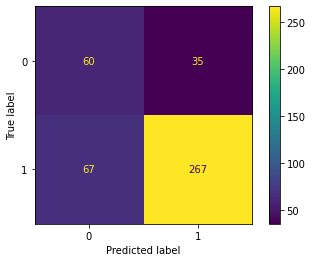

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score2=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score2)
print(report)

###**SVM**

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[[ 54  10]
 [ 73 292]]
accuracy score = 0.8065268065268065
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       127
           1       0.80      0.97      0.88       302

    accuracy                           0.81       429
   macro avg       0.82      0.70      0.72       429
weighted avg       0.81      0.81      0.78       429



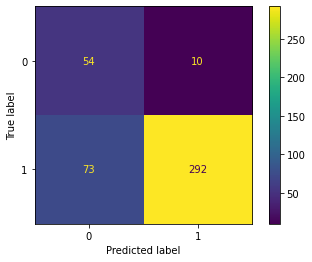

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score3=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score3)
print(report)

###**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

[[ 75  81]
 [ 52 221]]
accuracy score = 0.6899766899766899
              precision    recall  f1-score   support

           0       0.48      0.59      0.53       127
           1       0.81      0.73      0.77       302

    accuracy                           0.69       429
   macro avg       0.65      0.66      0.65       429
weighted avg       0.71      0.69      0.70       429



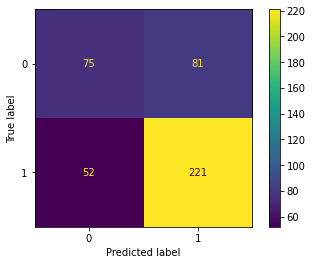

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score4=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score4)
print(report)

###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[[ 51   8]
 [ 76 294]]
accuracy score = 0.8041958041958042
              precision    recall  f1-score   support

           0       0.86      0.40      0.55       127
           1       0.79      0.97      0.88       302

    accuracy                           0.80       429
   macro avg       0.83      0.69      0.71       429
weighted avg       0.82      0.80      0.78       429



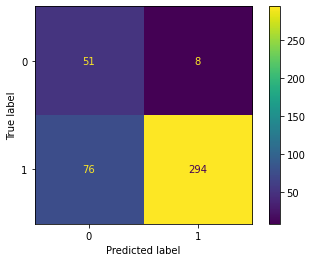

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score5=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score5)
print(report)

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[[ 59  18]
 [ 68 284]]
accuracy score = 0.7995337995337995
              precision    recall  f1-score   support

           0       0.77      0.46      0.58       127
           1       0.81      0.94      0.87       302

    accuracy                           0.80       429
   macro avg       0.79      0.70      0.72       429
weighted avg       0.79      0.80      0.78       429



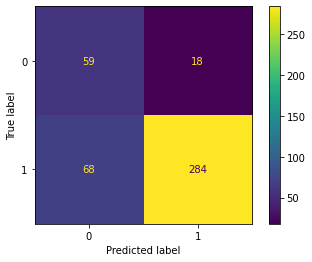

In [ ]:
#performance measurment
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[0,1]
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
report=classification_report(y_test,y_pred)
score6=accuracy_score(y_pred,y_test)
print(result)
print("accuracy score =",score6)
print(report)

#**Comparing Accuracy from different models**

In [ ]:
models=['KNN','Naive Bayes','SVM','Decision Tree','Random_Forest','Logistic Regression']
Accuracy_score=[score1,score2,score3,score4,score5,score6]
scores= pd.DataFrame({'Model':models, 'Accuracy_score':Accuracy_score})
scores

,Model,Accuracy_score
0,KNN,0.780886
1,Naive Bayes,0.762238
2,SVM,0.806527
3,Decision Tree,0.689977
4,Random_Forest,0.804196
5,Logistic Regression,0.799534


*Sorting*

In [ ]:
#SORTING model based on their accuracy score
scores.sort_values(by='Accuracy_score',ascending=False)

,Model,Accuracy_score
2,SVM,0.806527
4,Random_Forest,0.804196
5,Logistic Regression,0.799534
0,KNN,0.780886
1,Naive Bayes,0.762238
3,Decision Tree,0.689977


#**OBSERVATIONS**



1.   **SVM Algorithm gave highest accuracy score for this dataset**
2.   **Except Decision Tree,all the other algorithms gave above 70% accuracy**



**Visualizations**

*Bar Plot*

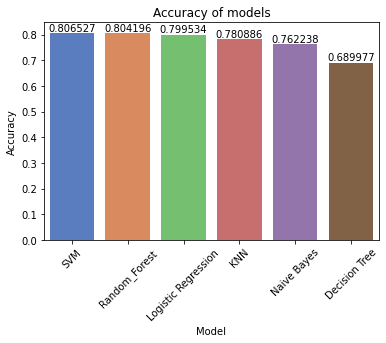

In [ ]:
ax=sns.barplot(x='Model',y='Accuracy_score',palette='muted',data=scores.sort_values(by='Accuracy_score',ascending=False),errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.xticks(rotation=45)
plt.show()

*Pair Plot*

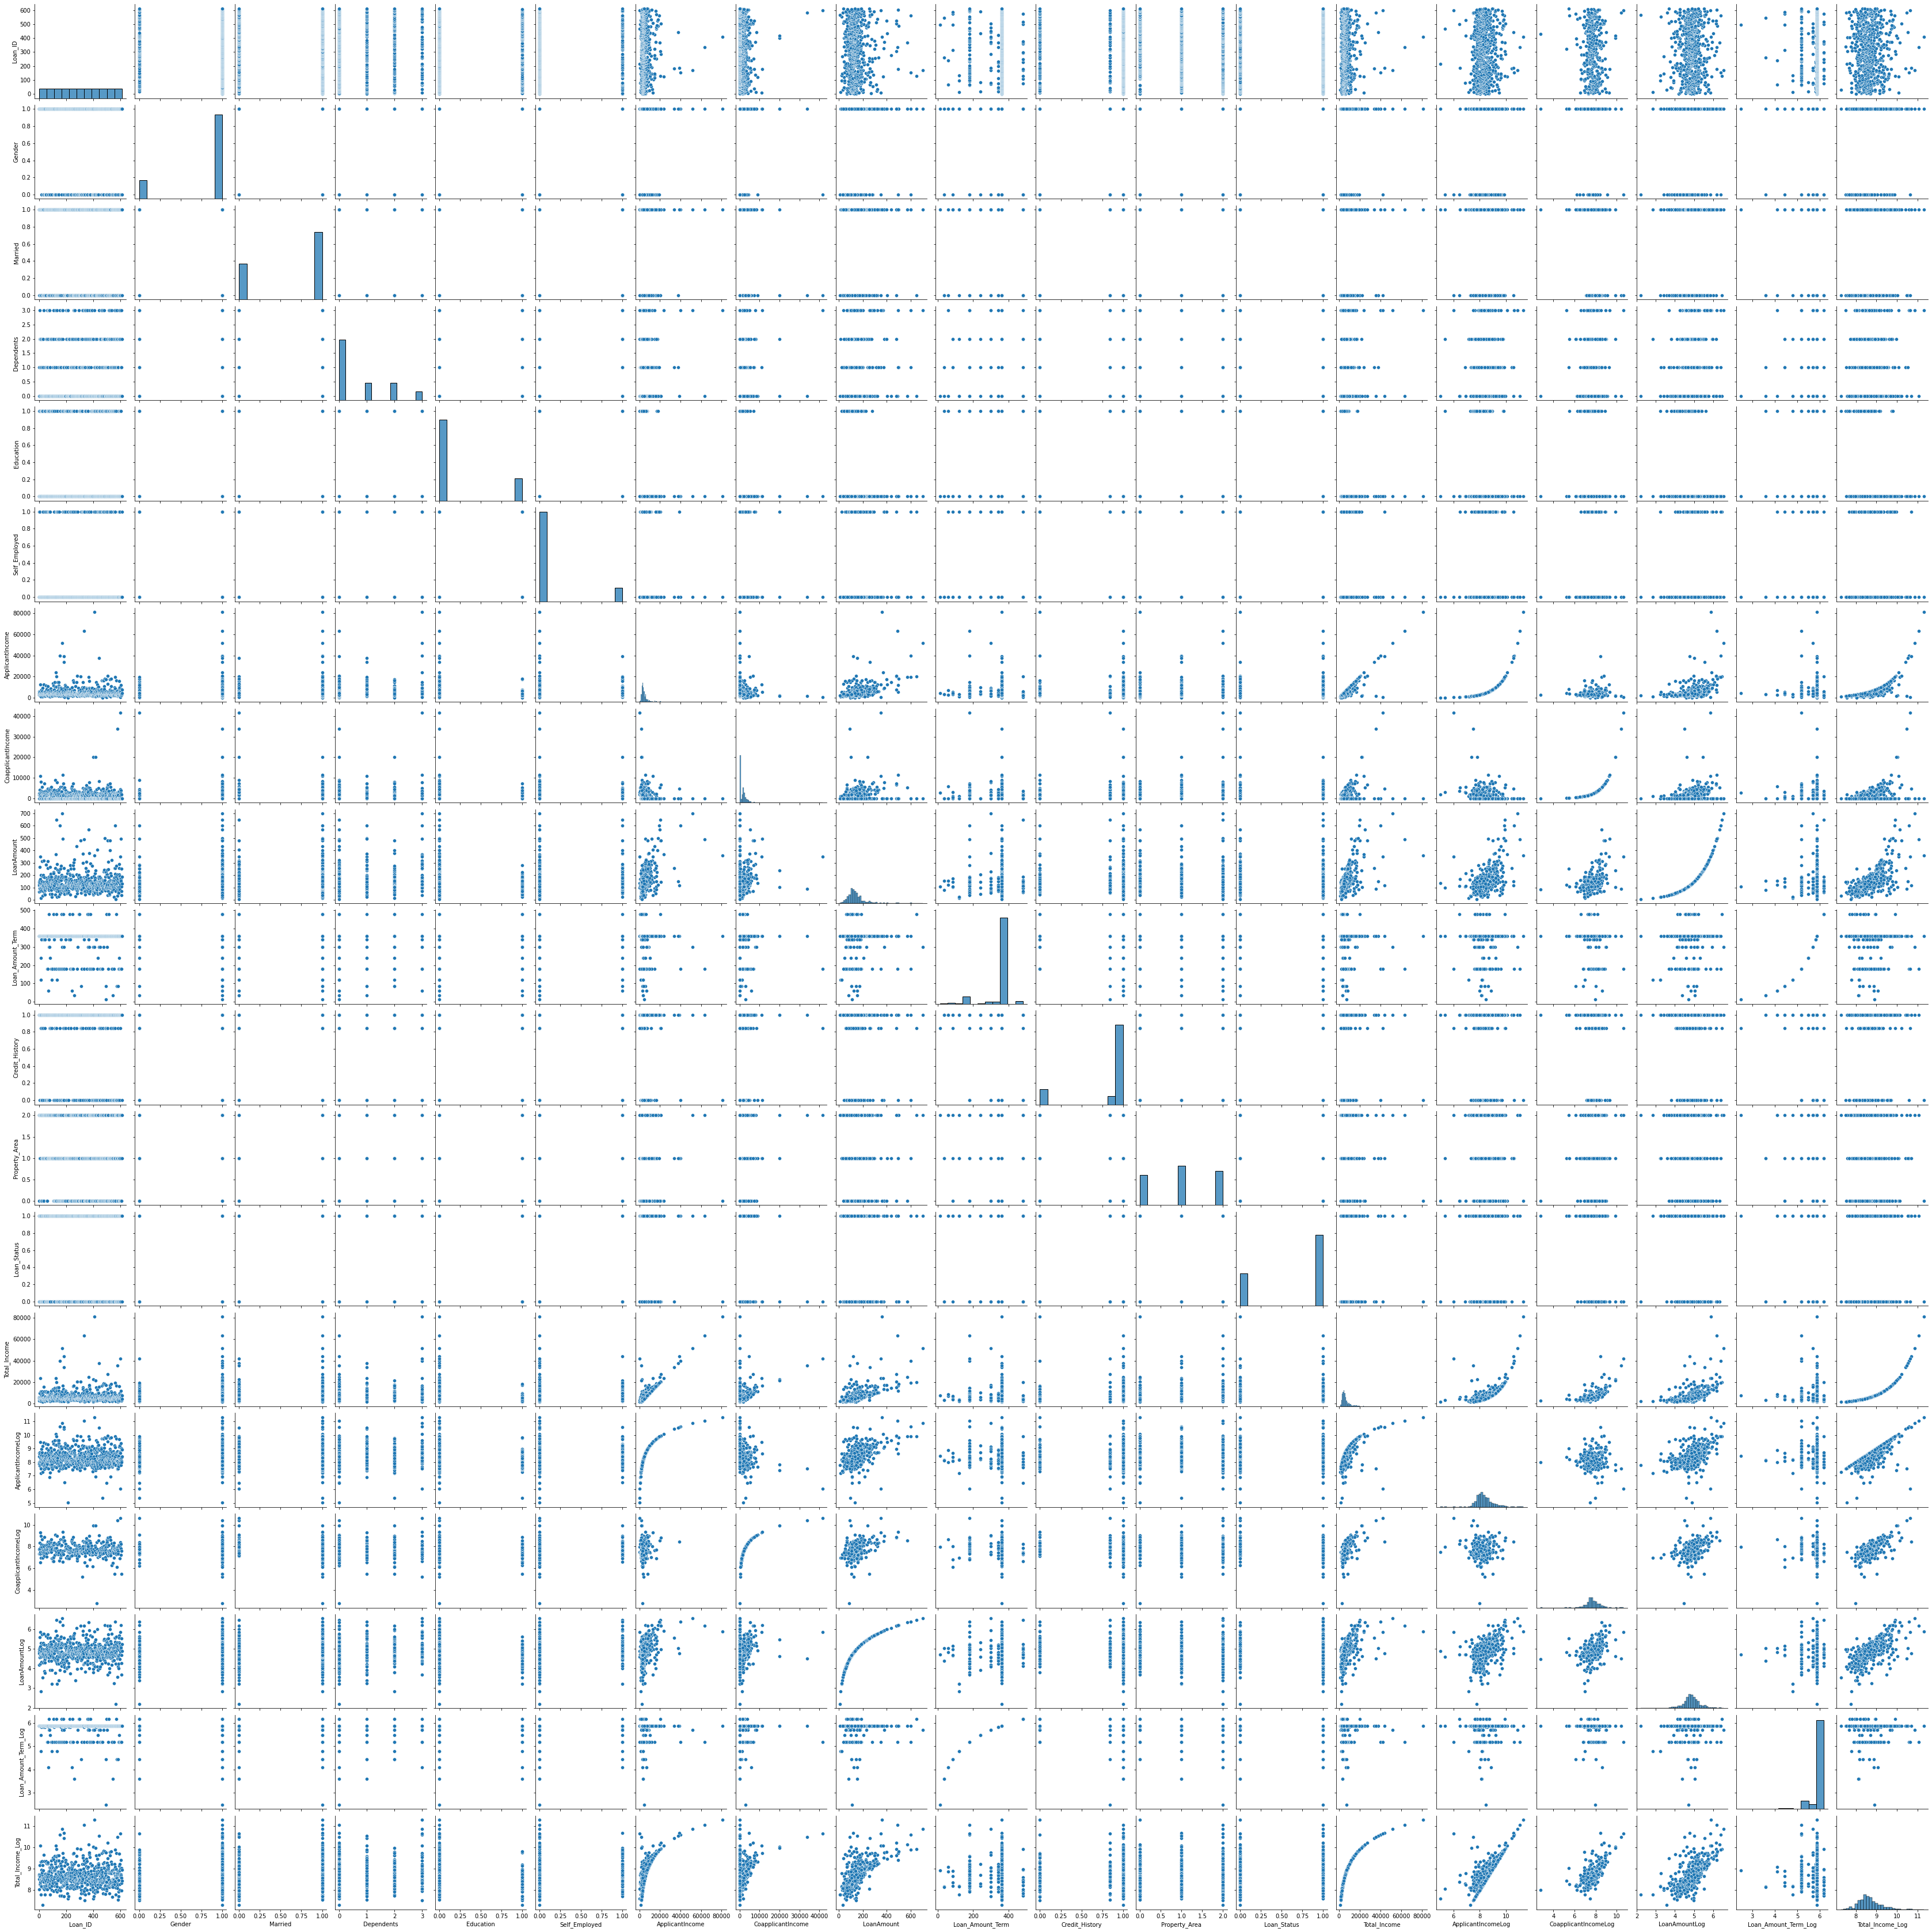

In [ ]:
sns.pairplot(df)